In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("/content/drive/MyDrive/DS Project/train.csv")


In [4]:
df.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0


In [5]:
df['winner']=df.apply(lambda row:0 if row['winner_model_a']==1 else(1 if row['winner_model_b']==1 else 2), axis=1)

In [6]:
df.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0,1
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1,2
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0,1


In [7]:
df.drop(['winner_model_a','winner_model_b', 'winner_tie'],axis=1,inplace=True)

In [8]:
df.head()

,id,model_a,model_b,prompt,response_a,response_b,winner
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",1
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",2
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",1


In [9]:
df.isnull().any()

,0
id,False
model_a,False
model_b,False
prompt,False
response_a,False
response_b,False
winner,False


In [10]:
from sentence_transformers import SentenceTransformer
model=SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [14]:
embeddings_prompt = model.encode(df['prompt'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/1797 [00:00<?, ?it/s]

In [15]:
embeddings_a = model.encode(df['response_a'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/1797 [00:00<?, ?it/s]

In [16]:
embeddings_b= model.encode(df['response_a'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/1797 [00:00<?, ?it/s]

In [18]:
import pickle

In [3]:
embeddings_Data={
    'embeddings_prompt':embeddings_prompt,
    'embeddings_a':embeddings_a,
    'embeddings_b':embeddings_b
}
#save .pkl file
with open('Embeddings.pkl', 'wb') as f:
  pickle.dump(embeddings_Data, f)
  f.close()
  print("Embeddings saved")

Embeddings saved


In [4]:
#open embeddings file
with open('Embeddings.pkl', 'rb') as f:
    loaded_embeddings = pickle.load(f)

# Access individual components
embeddings_a = loaded_embeddings['embeddings_a']
embeddings_b = loaded_embeddings['embeddings_b']
embeddings_prompt = loaded_embeddings['embeddings_prompt']


print("Embeddings loaded successfully.")
print("Shape of embeddings_a:", len(embeddings_a))
print("Shape of embeddings_b:", len(embeddings_b))
print("Shape of embeddings_b:", len(embeddings_prompt))


Embeddings loaded successfully.
Shape of embeddings_a: 57477
Shape of embeddings_b: 57477
Shape of embeddings_b: 57477


In [5]:
print(len(embeddings_a[0]))

384


In [6]:
print(len(embeddings_b[0]))

384


In [7]:
print(len(embeddings_prompt[0]))

384


In [8]:
#download embeddings file
from google.colab import files
files.download('Embeddings.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
import pickle

file_path = '/content/drive/MyDrive/Colab Notebooks/Embeddings (1).pkl'  # adjust path as needed

with open(file_path, 'rb') as f:
    embeddings_data = pickle.load(f)

# Access the individual parts
embeddings_a = embeddings_data['embeddings_a']
embeddings_b = embeddings_data['embeddings_b']
embeddings_prompt = embeddings_data['embeddings_prompt']

print("Embeddings loaded successfully!")
print("Shape of embeddings_a:", len(embeddings_a))
print("Shape of embeddings_b:", len(embeddings_b))
print("Shape of embeddings_prompt:", len(embeddings_prompt))

Embeddings loaded successfully!
Shape of embeddings_a: 57477
Shape of embeddings_b: 57477
Shape of embeddings_prompt: 57477


In [10]:
#calculating indivisual cosine similaries to avoid crash
import numpy as np

def fast_cosine_similarity(a, b):
    # Normalize both embeddings
    a_norm = a / np.linalg.norm(a, axis=1, keepdims=True)
    b_norm = b / np.linalg.norm(b, axis=1, keepdims=True)

    # Compute row-wise dot product (equivalent to cosine similarity for normalized vectors)
    return np.einsum('ij,ij->i', a_norm, b_norm)

# Efficient similarity between corresponding rows
#cos_sim_prompt_b = fast_cosine_similarity(embeddings_prompt, embeddings_b)
#cos_sim_a_b = fast_cosine_similarity(embeddings_a, embeddings_b)
#cos_sim_prompt_a = fast_cosine_similarity(embeddings_prompt, embeddings_a)

In [11]:
cos_sim_prompt_b = fast_cosine_similarity(embeddings_prompt, embeddings_b)

In [12]:
cos_sim_a_b = fast_cosine_similarity(embeddings_a, embeddings_b)

In [13]:
cos_sim_prompt_a = fast_cosine_similarity(embeddings_prompt, embeddings_a)

In [14]:
print(min(cos_sim_a_b), max(cos_sim_a_b))

0.99999964 1.0000005


In [15]:
print(min(cos_sim_prompt_b), max(cos_sim_prompt_b))

-0.14217162 1.0000002


In [16]:
print(min(cos_sim_prompt_a), max(cos_sim_prompt_a))

-0.14217162 1.0000002


In [17]:
import matplotlib.pyplot as plt


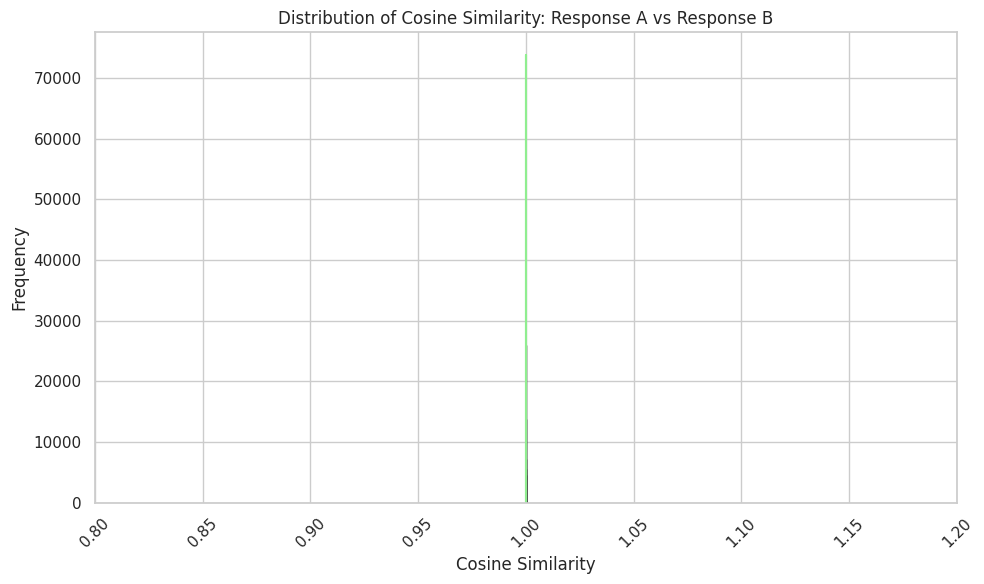

In [28]:
import seaborn as sns

# Set style for better visuals
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(cos_sim_a_b, bins=10, kde=True, color="lightgreen", edgecolor="black")

# Customize labels and title
plt.title("Distribution of Cosine Similarity: Response A vs Response B")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")

# Optional: Fix x-axis range if you want to zoom in
plt.xlim(0.8, 1.20000)

# Disable scientific notation
plt.ticklabel_format(useOffset=False)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

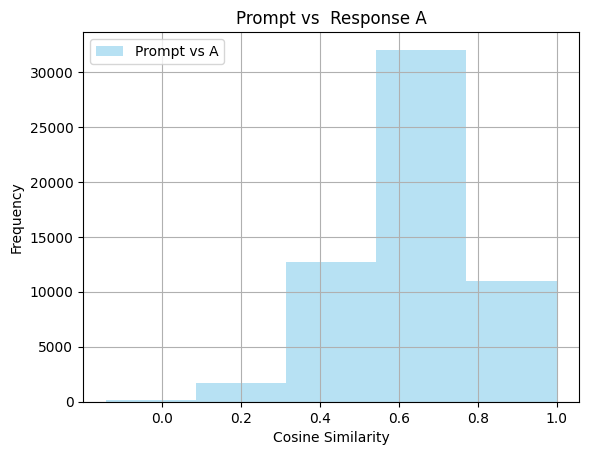

In [61]:
plt.hist(cos_sim_prompt_a, bins=5, alpha=0.6, label='Prompt vs A', color='skyblue')

plt.title("Prompt vs  Response A")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

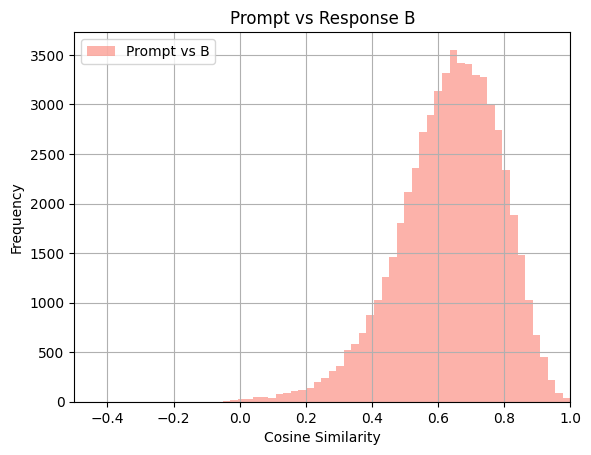

In [64]:
plt.hist(cos_sim_prompt_b, bins=50, alpha=0.6, label='Prompt vs B', color='salmon')

plt.title("Prompt vs Response B")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

plt.xlim(-0.5, 1)  # Restricting to [-1, 1]
plt.show()